# Data exploration

Two datasets available from kaggle: https://www.kaggle.com/zynicide/wine-reviews

- winemag-data_first150k.csv
- winemag-data-130k-v2.csv

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Dataset wines1: winemag-data_first150k.csv

In [2]:
wines1 = pd.read_csv("../data/winemag-data_first150k.csv", index_col=0)
wines1

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [3]:
wines1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150930 non-null  object 
 9   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB


<font color=blue>10 columns:
- 2 numerical
- 8 object type

Some values missing on designation (45 000), price (13 000), region_1 and region_2</font>

## Dataset wines2: winemag-data-130k-v2.csv

In [4]:
wines2 = pd.read_csv("../data/winemag-data-130k-v2.csv", index_col=0)
wines2

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [5]:
wines2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


<font color=blue>13 columns:
- 2 numericals
- 11 object type
    
The columns are the same as the dataset wines1 plus 3 additional columns:
- taster_name
- taster_twitter_handle
- title
    
Missing values on designation, region_1, region_2, taster_name and taster_twitter_handle</font>

<font color=blue>**=> concatenation of the two datasets wines1 and wines2 for common data exploration**</font>

## Concatenation of the two datasets

In [6]:
wines_raw = pd.concat([wines1, wines2], axis=0, ignore_index=True)
wines_raw

,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280896,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...
280897,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Pinot Noir,Citation,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon)
280898,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Gewürztraminer,Domaine Gresser,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...
280899,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Pinot Gris,Domaine Marcel Deiss,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace)


In [7]:
wines_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280901 entries, 0 to 280900
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                280833 non-null  object 
 1   description            280901 non-null  object 
 2   designation            197701 non-null  object 
 3   points                 280901 non-null  int64  
 4   price                  258210 non-null  float64
 5   province               280833 non-null  object 
 6   region_1               234594 non-null  object 
 7   region_2               111464 non-null  object 
 8   variety                280900 non-null  object 
 9   winery                 280901 non-null  object 
 10  taster_name            103727 non-null  object 
 11  taster_twitter_handle  98758 non-null   object 
 12  title                  129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 27.9+ MB


In [8]:
duplicated = wines2[wines2.duplicated()]

In [9]:
wines2_uniques = wines2.drop_duplicates()
wines2_uniques.to_csv("../data/clean_data.csv")

## Check for duplicates between the the two datasets

In [10]:
wines_raw.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery', 'taster_name',
       'taster_twitter_handle', 'title'],
      dtype='object')

In [11]:
# drop the columns present only in wines2, and check for duplicates
wines_duplicates = wines_raw[['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery']]
wines_duplicates[wines_duplicates.duplicated()] 

,country,description,designation,points,price,province,region_1,region_2,variety,winery
300,US,This standout Rocks District wine brings earth...,The Funk Estate,94,60.0,Washington,Walla Walla Valley (WA),Columbia Valley,Syrah,Saviah
305,New Zealand,"Yields were down in 2015, but intensity is up,...",Maté's Vineyard,94,57.0,Kumeu,NaN,NaN,Chardonnay,Kumeu River
420,US,"Though just four years old, this wine seems ad...",NaN,87,36.0,Washington,Columbia Valley (WA),Columbia Valley,Cabernet Sauvignon,Dussek Family Cellars
422,US,Tawny in color and wafting of potpourri and fa...,NaN,87,20.0,New York,Finger Lakes,Finger Lakes,Cabernet Franc,Serenity
423,US,"The aromas on this wine are quite light, conve...",Weinbau,87,32.0,Washington,Wahluke Slope,Columbia Valley,Grenache,Sol Stone
...,...,...,...,...,...,...,...,...,...,...
280865,US,"This has lovely raspberry and cranberry fruit,...",NaN,91,38.0,Washington,Columbia Valley-Walla Walla Valley,Columbia Valley,Syrah,Va Piano
280866,France,A blend from several premier cru vineyards in ...,Premier Cru,91,66.0,Burgundy,Pommard,NaN,Pinot Noir,Bouchard Père & Fils
280867,Austria,"Smooth, creamy aromas are followed by a rich, ...",Langenloiser Berg-Vogelsang,91,32.0,Kamptal,NaN,NaN,Grüner Veltliner,Bründlmayer
280868,Argentina,Compared to the regular 2006 Malbec from Chaka...,Reserve,91,25.0,Mendoza Province,Luján de Cuyo,NaN,Malbec,Chakana


## Create clean dataset
Use only wines2, and drop duplicates. The clean dataset is called "wines".

In [12]:
# checking for duplicated within wines2
duplicated = wines2[wines2.duplicated()]
duplicated

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
2408,US,"This is weighty, creamy and medium to full in ...",NaN,85,14.0,California,North Coast,North Coast,Virginie Boone,@vboone,Souverain 2010 Chardonnay (North Coast),Chardonnay,Souverain
2409,Italy,There's a touch of toasted almond at the start...,Sallier de la Tour,85,13.0,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Tasca d'Almerita 2011 Sallier de la Tour Grill...,Grillo,Tasca d'Almerita
2410,Chile,Lightly herbal strawberry and raspberry aromas...,Reserve,85,13.0,Maipo Valley,NaN,NaN,Michael Schachner,@wineschach,Tres Palacios 2011 Reserve Pinot Noir (Maipo V...,Pinot Noir,Tres Palacios
2412,Italy,The Monica grape often shows a rustic or raw q...,Dolia,85,14.0,Sicily & Sardinia,Monica di Sardegna,NaN,NaN,NaN,Cantine di Dolianova 2010 Dolia (Monica di Sa...,Monica,Cantine di Dolianova
2413,France,"Fruity and lightly herbaceous, this has fine t...",La Fleur d'Amélie,85,15.0,Bordeaux,Bordeaux Blanc,NaN,Roger Voss,@vossroger,Château de Sours 2011 La Fleur d'Amélie (Bord...,Bordeaux-style White Blend,Château de Sours
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129879,US,"This wine is a blend of 45% Grenache, 37% Syra...",Metis,90,20.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Maison Bleue 2013 Metis Red (Columbia Valley (...,Red Blend,Maison Bleue
129880,US,Apple blossom intrigues on the nose of this li...,NaN,90,20.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Martin Ray 2015 Chardonnay (Russian River Valley),Chardonnay,Martin Ray
129881,Spain,This Verdejo smells like citrus fruits and wil...,NaN,90,19.0,Northern Spain,Rueda,NaN,Michael Schachner,@wineschach,Martinsancho 2015 Verdejo (Rueda),Verdejo,Martinsancho
129882,US,"This wine is mostly Cabernet Sauvignon (78%), ...",Reserve,90,60.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Matthews 2012 Reserve Red (Columbia Valley (WA)),Bordeaux-style Red Blend,Matthews


In [13]:
# creating final cleann dataset by droping the duplicates in wines2
wines = wines2.drop_duplicates()
wines.to_csv("../data/clean_data.csv")
wines.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [14]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119988 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                119929 non-null  object 
 1   description            119988 non-null  object 
 2   designation            85443 non-null   object 
 3   points                 119988 non-null  int64  
 4   price                  111593 non-null  float64
 5   province               119929 non-null  object 
 6   region_1               100428 non-null  object 
 7   region_2               46769 non-null   object 
 8   taster_name            95071 non-null   object 
 9   taster_twitter_handle  90542 non-null   object 
 10  title                  119988 non-null  object 
 11  variety                119987 non-null  object 
 12  winery                 119988 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.8+ MB


## Adding new variable "year" to the dataset

In [58]:
# getting list of years
wines_title_list = list(wines.title)
year=[]
for i in range(len(wines.title)):
    year.append(re.findall("\d{4}", wines_title_list[i]))
year

# replace empty lists by NaN so that they are not deleted when flattening the list
years = [[0] if len(i)==0 else i[0] for i in year]
years

# replace empty lists by NaN so that they are not deleted when flattening the list
years = [i[0] if i==[0] else int(i) for i in years]
years

# adding new variable 'years' to the dataset
wines = wines[wines["year"] == years]
wines

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2013
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,2004
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2013
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2012


In [59]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119988 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                119929 non-null  object 
 1   description            119988 non-null  object 
 2   designation            85443 non-null   object 
 3   points                 119988 non-null  int64  
 4   price                  111593 non-null  float64
 5   province               119929 non-null  object 
 6   region_1               100428 non-null  object 
 7   region_2               46769 non-null   object 
 8   taster_name            95071 non-null   object 
 9   taster_twitter_handle  90542 non-null   object 
 10  title                  119988 non-null  object 
 11  variety                119987 non-null  object 
 12  winery                 119988 non-null  object 
 13  year                   119988 non-null  int64  
dtypes: float64(1), int64(2), object(11)


### Numerical variables

<font color=blue>The 2 numerical variables are points and price. </font>

In [15]:
wines.describe()

,points,price
count,119988.000000,111593.000000
mean,88.442236,35.620747
std,3.092915,42.103728
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


<font color=blue> 
- points range from 80 to 100
- price ranges from 4 to 3,300 (check currency)</font>

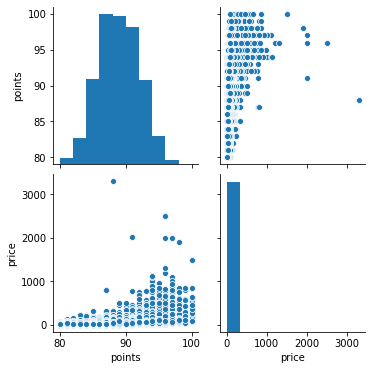

In [16]:
sns.pairplot(wines)
plt.show()

<font color=blue>No apparent correlation between points and price</font>

#### Points

<font color=blue>**Kaggle description for points:** the number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score &gt;=80)</font>

In [17]:
wines.points.describe()

count    119988.000000
mean         88.442236
std           3.092915
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

<font color=blue>dtype is float, change dtype to integer

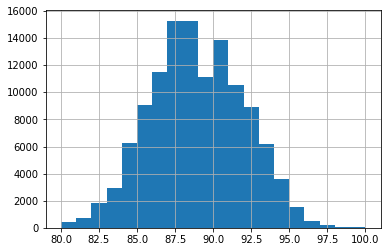

In [18]:
wines['points'].hist(bins=20)
plt.show()

<font color=blue> 
- Normal distribution of the points
- No NaNs</font>

#### Price

<font color=blue> Kaggle description:
- price: The cost for a bottle of the wine
</font>

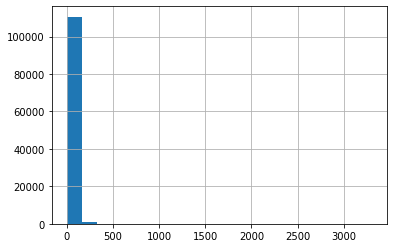

In [19]:
wines.price.hist(bins=20)
plt.show()

<font color=blue> 
- Currency unknown
- maybe analyze by range of price, most wines fall below 500</font>

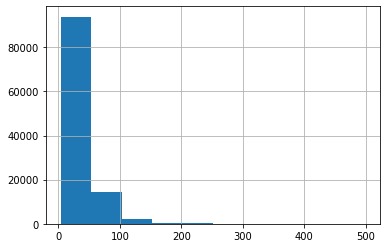

In [20]:
wines_low = wines[wines["price"]<500]
wines_low["price"].hist()
plt.show()

<font color=blue>More than 90% of the wine have price below than 100. Maybe use categories of prices (low, medium, high)</font>

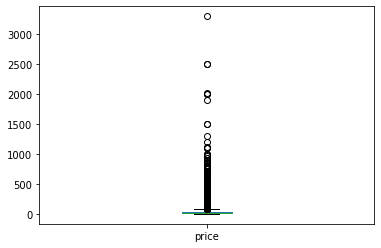

In [21]:
wines.price.plot.box()
plt.show()

<font color=blue>Box plot confirms ourliers in terms of price.</font>

### Categorical variables

#### Country

<font color=blue>Kaggle column description: The country that the wine is from</font>

In [22]:
wines.country.value_counts()

US                        50457
France                    20353
Italy                     17940
Spain                      6116
Portugal                   5256
Chile                      4184
Argentina                  3544
Austria                    3034
Australia                  2197
Germany                    1992
South Africa               1301
New Zealand                1278
Israel                      466
Greece                      432
Canada                      226
Bulgaria                    132
Hungary                     129
Romania                     102
Uruguay                      98
Turkey                       81
Slovenia                     77
Georgia                      76
Croatia                      70
Mexico                       68
England                      63
Moldova                      56
Brazil                       49
Lebanon                      32
Morocco                      24
Peru                         16
Ukraine                      14
Macedoni

In [23]:
len(wines.country.value_counts())

43

<font color=blue>nº countries = 50</font>

#### Description

<font color=blue>Kaggle column description: A few sentences from a sommelier describing the wine's taste, smell, look, feel, etc.</font>

In [24]:
wines.description.describe(include=all)

count                                                119988
unique                                               119955
top       This opens with subtle aromas of wild flower a...
freq                                                      2
Name: description, dtype: object

<font color=blue>Maybe look for the words most repeated in *description*

#### Province

<font color=blue>Kaggle column description: The province or state that the wine is from</font>

In [25]:
wines.groupby("country")["province"].value_counts().to_frame()

province
country   province                  
Argentina Mendoza Province      3038
          Other                  506
Armenia   Armenia                  2
Australia South Australia       1271
          Victoria               303
...                              ...
Uruguay   Juanico                 11
          Progreso                11
          Montevideo              10
          Atlantida                5
          San Jose                 3

[425 rows x 1 columns]

<font color=blue>490 provinces, best to focus on countries

#### Designation

<font color=blue>Kaggle column description: The vineyard within the winery where the grapes that made the wine are from

In [26]:
wines.designation

0                                   Vulkà Bianco
1                                       Avidagos
2                                            NaN
3                           Reserve Late Harvest
4             Vintner's Reserve Wild Child Block
                           ...                  
129966    Brauneberger Juffer-Sonnenuhr Spätlese
129967                                       NaN
129968                                     Kritt
129969                                       NaN
129970             Lieu-dit Harth Cuvée Caroline
Name: designation, Length: 119988, dtype: object

In [27]:
wines.designation.describe(include=all)

count       85443
unique      37979
top       Reserve
freq         1871
Name: designation, dtype: object

<font color=blue> 
- Designation seems very general terms about the wine.
- Maybe try to correlate with the name of the wine if NaN for the name.
- 1/3 are NaNs

#### region_1 & region_2

<font color=blue> Kaggle column description:
- region_1: The wine growing area in a province or state (ie Napa)
- region_2: Sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank

In [28]:
wines.region_1.describe(include=all)

count          100428
unique           1229
top       Napa Valley
freq             4174
Name: region_1, dtype: object

In [29]:
wines.region_2.describe(include=all)

count             46769
unique               17
top       Central Coast
freq              10233
Name: region_2, dtype: object

<font color=blue>Many NaNs for region two. Too many unique values for regions and besides those columns refer to a province. As we already discuss that country would be sufficient classification level for our study, the columns region will be dropped.

#### Variety

<font color=blue>Kaggle column description: The type of grapes used to make the wine (ie Pinot Noir) - *cépage/tipo de uva*

In [30]:
wines.variety.value_counts() 

Pinot Noir                  12278
Chardonnay                  10868
Cabernet Sauvignon           8840
Red Blend                    8243
Bordeaux-style Red Blend     6471
                            ...  
Kuntra                          1
Tinta Amarela                   1
Babosa Negro                    1
Francisa                        1
Meseguera                       1
Name: variety, Length: 707, dtype: int64

In [31]:
wines.variety.describe(include=all)

count         119987
unique           707
top       Pinot Noir
freq           12278
Name: variety, dtype: object

<font color=blue> 756 different varieties. Might be interesting to link it to the price and country.

In [32]:
wines[wines["variety"]=="Pinot Noir"].country.value_counts()

US              9165
France          1817
New Zealand      451
Chile            339
Australia        119
Argentina         99
Austria           93
Germany           53
South Africa      27
Canada            21
Portugal          17
Romania           14
Bulgaria          12
Spain             11
Israel             6
England            6
Slovenia           6
Italy              6
Uruguay            5
Brazil             2
Switzerland        2
Macedonia          2
Croatia            1
Hungary            1
Name: country, dtype: int64

In [33]:
wines[wines["variety"]=="Pinot Noir"].price.describe()

count    11835.000000
mean        47.875201
std         49.085969
min          5.000000
25%         28.000000
50%         42.000000
75%         55.000000
max       2500.000000
Name: price, dtype: float64

#### Winery

<font color=blue>Kaggle column description: The winery that made the wine

In [34]:
wines.winery.value_counts()

Wines & Winemakers       211
Williams Selyem          204
Testarossa               201
DFJ Vinhos               200
Louis Latour             192
                        ... 
Ryzin                      1
Triumph                    1
Vezer Family Vineyard      1
Château d'Auvernier        1
Domaine du Gouyat          1
Name: winery, Length: 16757, dtype: int64

In [35]:
wines.winery.describe(include=all)

count                 119988
unique                 16757
top       Wines & Winemakers
freq                     211
Name: winery, dtype: object

<font color=blue> No NaNs, many unique values. Maybe study can be performed looking at the winery rather than wine's name.

In [36]:
wines.groupby("winery")["points"].mean().sort_values(ascending=False)

winery
Araujo                   98.000000
J.L. Chave               97.000000
Ovid                     97.000000
Gandona                  97.000000
Tenuta dell'Ornellaia    96.888889
                           ...    
Château Majoureau        80.000000
Torito Bravo             80.000000
Woomera                  80.000000
Bodegas del Mundo        80.000000
Fog Hill                 80.000000
Name: points, Length: 16757, dtype: float64

<font color=blue> if winery have one wine reviewed, points mean is biased !

#### taster_name

<font color=blue> no column description in Kaggle

In [37]:
wines.taster_name

0              Kerin O’Keefe
1                 Roger Voss
2               Paul Gregutt
3         Alexander Peartree
4               Paul Gregutt
                 ...        
129966    Anna Lee C. Iijima
129967          Paul Gregutt
129968            Roger Voss
129969            Roger Voss
129970            Roger Voss
Name: taster_name, Length: 119988, dtype: object

In [38]:
wines.taster_name.describe(include=all)

count          95071
unique            19
top       Roger Voss
freq           23560
Name: taster_name, dtype: object

<font color=blue>19 unique tasters. Many NaNs as this column was not present in dataset wines1. Maybe drop this column.
    

#### taster_twitter_handle

<font color=blue> No column description in kaggle

In [39]:
wines.taster_twitter_handle

0         @kerinokeefe
1           @vossroger
2          @paulgwine 
3                  NaN
4          @paulgwine 
              ...     
129966             NaN
129967     @paulgwine 
129968      @vossroger
129969      @vossroger
129970      @vossroger
Name: taster_twitter_handle, Length: 119988, dtype: object

In [40]:
wines.taster_twitter_handle.describe()

count          90542
unique            15
top       @vossroger
freq           23560
Name: taster_twitter_handle, dtype: object

In [41]:
wines.taster_twitter_handle.value_counts()

@vossroger          23560
@wineschach         14046
@kerinokeefe         9697
@paulgwine           8868
@vboone              8708
@mattkettmann        5730
@JoeCz               4766
@wawinereport        4461
@gordone_cellars     3766
@AnneInVino          3290
@laurbuzz            1700
@suskostrzewa        1023
@worldwineguys        897
@bkfiona               24
@winewchristina         6
Name: taster_twitter_handle, dtype: int64

<font color=blue>Seems to be the twitter account of tasters. 4 tasters have no twitter account or are missing. Same as taster_name column with NaNs as this column does not exist in dataset wines1. Propose to drop this column.

#### title

<font color=blue>Kaggle column description: The title of the wine review, which often contains the vintage if you're interested in extracting that feature

In [42]:
wines.title

0                         Nicosia 2013 Vulkà Bianco  (Etna)
1             Quinta dos Avidagos 2011 Avidagos Red (Douro)
2             Rainstorm 2013 Pinot Gris (Willamette Valley)
3         St. Julian 2013 Reserve Late Harvest Riesling ...
4         Sweet Cheeks 2012 Vintner's Reserve Wild Child...
                                ...                        
129966    Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...
129967                    Citation 2004 Pinot Noir (Oregon)
129968    Domaine Gresser 2013 Kritt Gewurztraminer (Als...
129969        Domaine Marcel Deiss 2012 Pinot Gris (Alsace)
129970    Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...
Name: title, Length: 119988, dtype: object

In [43]:
wines.title.describe()

count                                                119988
unique                                               118840
top       Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...
freq                                                      9
Name: title, dtype: object

In [44]:
wines[wines["title"]=="Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)"]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
3209,US,"Creamy, lush and somewhat robust, this dry spa...",Sonoma Brut,90,22.0,California,Sonoma County,Sonoma,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer
4399,US,"Made predominantly from Pinot Noir, this is an...",Sonoma Brut,88,22.0,California,Sonoma County,Sonoma,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer
27773,US,A wonderfully drinkable sparkling wine that ap...,Sonoma Brut,90,20.0,California,Sonoma County,Sonoma,NaN,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer
63179,US,"Made from mostly Pinot Noir grapes, with an ad...",Sonoma Brut,92,22.0,California,Sonoma County,Sonoma,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer
81563,US,This wine shows lots of finesse for the price....,Sonoma Brut,89,24.0,California,Sonoma County,Sonoma,NaN,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer
94321,US,"A bit rough and scouring in texture, this tast...",Sonoma Brut,85,20.0,California,Sonoma County,Sonoma,NaN,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer
100738,US,"A good, dry and elegant bubbly. Shows crisp fl...",Sonoma Brut,89,20.0,California,Sonoma County,Sonoma,NaN,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer
109001,US,From almost 92% Pinot Noir with the remainder ...,Sonoma Brut,88,22.0,California,Sonoma County,Sonoma,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer
122208,US,This bubbly is rich in cherry and raspberry fr...,Sonoma Brut,86,20.0,California,Sonoma County,Sonoma,NaN,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer


<font color=blue> Many NaNs but column can be usefull to extract the vintage of the wine. It looks like information from other columns are nested in the title such as variety, regions, province, etc

<font color=blue>get year of each wine from "title" variable and append to new column

# Data cleaning

### Questions
- What makes a good wine ?
- Where is the most expensive wine from ?
- What is the country that export the most wines ?
- Consumption pattern of wine by country
- Tips to select a good wine ?

### Insights from data exploration

- Regions: eliminate Region1 and Region2
- drop taster_name & taster_twitter_handle
- Change point type to integers
- Create categories for wine price
- look for the words most repeated in description
- compare designation and title columns
- Extract vintage and other information from title to fill NaNs and create a new column vintage